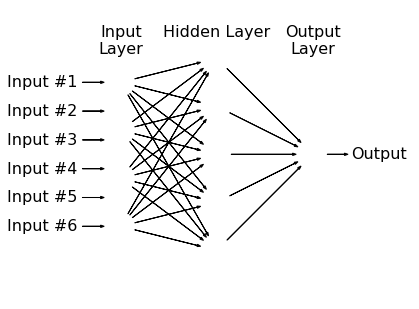

In [1]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(facecolor='w')
ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='none', lw=2)
    ax.add_patch(circ)

x1 = -2
x2 = 0
x3 = 2
y3 = 0

#------------------------------------------------------------
# Input Layer
for i, y1 in enumerate(np.linspace(1.5, -1.5, 5)):
    draw_circle(ax, (x1, y1), radius)
    ax.text(x1 - 0.9, y1, 'Input #%i' % (i + 1),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x1 - 0.9, y1), 0.1, (x1, y1), radius)

# Hidden Layers
for y2 in np.linspace(-2, 2, 5):
    draw_circle(ax, (x2, y2), radius)

draw_circle(ax, (x3, y3), radius)
ax.text(x3 + 0.8, y3, 'Output', ha='left', va='center', fontsize=16)
draw_connecting_arrow(ax, (x3, y3), radius, (x3 + 0.8, y3), 0.1)

#------------------------------------------------------------
# draw connecting arrows
for y1 in np.linspace(-1.5, 1.5, 4):
    for y2 in np.linspace(-2, 2, 5):
        draw_connecting_arrow(ax, (x1, y1), radius, (x2, y2), radius)

for y2 in np.linspace(-2, 2, 5):
    draw_connecting_arrow(ax, (x2, y2), radius, (x3, y3), radius)

#------------------------------------------------------------
# Add text labels
plt.text(x1, 2.7, "Input\nLayer", ha='center', va='top', fontsize=16)
plt.text(x2, 2.7, "Hidden Layer", ha='center', va='top', fontsize=16)
plt.text(x3, 2.7, "Output\nLayer", ha='center', va='top', fontsize=16)

ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()